In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad


In [2]:
sp.init_printing()

# LatexText

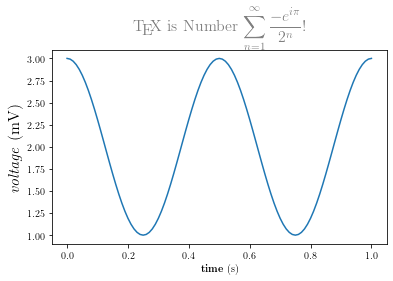

In [3]:
"""
Demo of TeX rendering.

You can use TeX to render all of your matplotlib text if the rc
parameter text.usetex is set.  This works currently on the agg and ps
backends, and requires that you have tex and the other dependencies
described at http://matplotlib.sf.net/matplotlib.texmanager.html
properly installed on your system.  The first time you run a script
you will see a lot of output from tex and associated tools.  The next
time, the run may be silent, as a lot of the information is cached in
~/.tex.cache

"""
import numpy as np
import matplotlib.pyplot as plt


# Example data
t = np.arange(0.0, 1.0 + 0.01, 0.01)
s = np.cos(4 * np.pi * t) + 2

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.plot(t, s)

plt.xlabel(r'\textbf{time} (s)')
plt.ylabel(r'\textit{voltage} (mV)',fontsize=16)
plt.title(r"\TeX\ is Number "
          r"$\displaystyle\sum_{n=1}^\infty\frac{-e^{i\pi}}{2^n}$!",
          fontsize=16, color='gray')
# Make room for the ridiculously large title.
plt.subplots_adjust(top=0.8)

plt.show()

# Programa

Funciones para encontrar los coefficientes $a_n$ y $ b_n$

In [5]:
def ancoefficiente(f ,n, L): #com t como argumento da funçao
    anfun = lambda t: f(t)*1/L*np.cos(n*np.pi*t/L)
    an = quad(anfun,-L,L)
    return an
def bncoefficiente(f, n, L):
    bnfun = lambda t: 1/L*f(t)*np.sin(n*np.pi*t/L)
    bn = quad(bnfun,-L,L)
    return bn

parcelaNfourier calcula los coefficientes de a y b para el enesimo termino de la serie

fouriersum calcula y retorna la funcion como serie

In [6]:
def parcelaNfourier(f, n, L):
      return ancoefficiente(f,n,L), bncoefficiente(f,n,L)
def fouriersum(f,n, L):
    x = np.linspace(-L,L,100)
    funfourier = parcelaNfourier(f,0,L)[0][0]/2
    for i in range(1, n+1):
        an = parcelaNfourier(f,i,L)[0][0]
        bn = parcelaNfourier(f,i,L)[1][0]
        funfourier += an*np.cos(i*np.pi*x/L)+ bn*np.sin(i*np.pi*x/L)
    return funfourier


In [7]:
def fourierplot(f,fescrita, n, L):
    fig, ax1 = plt.subplots(figsize=(10,6))
    x= np.linspace(-L,L, 100)
    plt.plot(x , f(x), label = "${}$".format(fescrita))
    plt.plot(x, fouriersum(f,1, L), label = "Expansion de Fourier con n = %d"  %(1))
    plt.plot(x, fouriersum(f,int(np.round(n/4)), L), label = "Expansion de fourier con n = %d"  %(int(np.round(n/4))))
    plt.plot(x, fouriersum(f,int(np.round(n/2)), L), label = "Expansion de fourier con n = %d"  %(int(np.round(n/2))))
    plt.plot(x, fouriersum(f,n, L), label = "Expansion de fourier con n = %d"  %n)
    
    plt.xlabel(r"$x$")
    plt.ylabel(r'$f(x)$',fontsize=16)
    plt.title(r" f(x) y aproximaciones de Serie de Fourier de f(x) para diferentes $N$ ",
          fontsize=16, color='black')
    plt.legend(loc='best')
    plt.show()


In [8]:
def fouriersubplot(f,fescrita, L, *args): #funcion,fescrita, dominio de -L a L , y fourier para plotar
    fig = plt.figure(figsize=(10,10))
    x= np.linspace(-L,L, 100)
    
  
    for i in range(len(args)):
        ax1 = plt.subplot(len(args),1,i+1)
        ax1.plot(x , f(x), label = "${}$".format(fescrita))
        ax1.plot(x, fouriersum(f,args[i] , L), label = "Expansión de fourier con n = %d"  %(args[i]))
        ax1.legend(loc='best')
        plt.xlabel(r" $x$")
        plt.ylabel(r'$f(x)$',fontsize=16)
        


    fig.suptitle(r" $f(x)$ y aproximaciones de Serie de Fourier de $f(x) $ para diferentes $N$  ", y = 1.005)

        
    fig.tight_layout()

        
        
    plt.show()


In [9]:
def f(x):
    return x

In [10]:
def g(x):
    return np.log(x+5)

Para usar cambiar la funcion f de arriba, n numero de parcelas en la suma y , L medio periodo de la forma (-L,L)

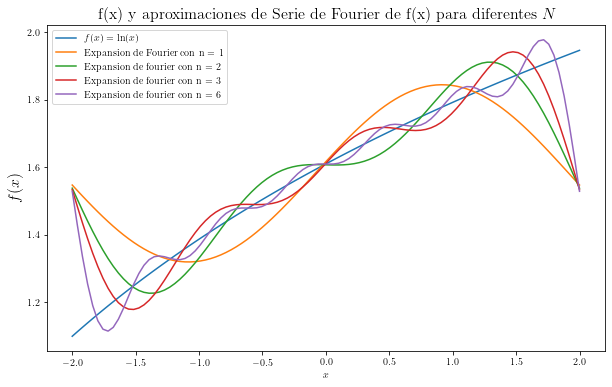

In [11]:
fourierplot(g,"f(x) = \ln(x)",6,2)

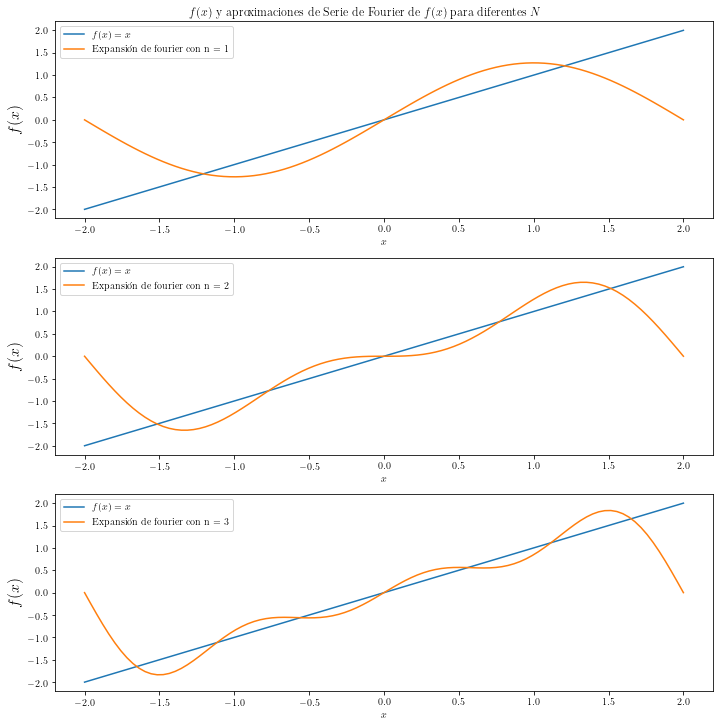

In [12]:
fouriersubplot(f,"f(x) = x",2,1,2,3)

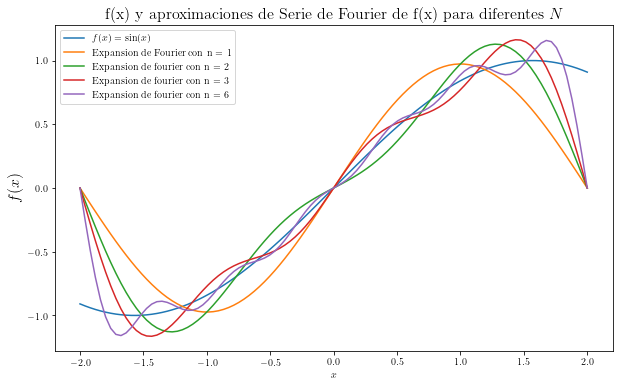

In [154]:
fourierplot(lambda x : np.sin(x),"f(x) = \sin(x)",6,2)
